In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge

In [2]:
boston = pd.read_csv('HousingData.csv')

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
boston.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
print(boston.PTRATIO)

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64


In [6]:
print(boston.ZN)

0      18.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
501     0.0
502     0.0
503     0.0
504     0.0
505     0.0
Name: ZN, Length: 506, dtype: float64


In [7]:
boston.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [8]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
boston['CRIM'].fillna(value=boston['CRIM'].mean(),inplace=True)
boston['INDUS'].fillna(value=boston['INDUS'].mean(),inplace=True)
boston['CHAS'].fillna(value=boston['CHAS'].mean(),inplace=True)
boston['AGE'].fillna(value=boston['AGE'].mean(),inplace=True)
boston['LSTAT'].fillna(value=boston['LSTAT'].mean(),inplace=True)
boston['ZN'].fillna(value=boston['ZN'].mean(),inplace=True)

In [10]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
boston.shape

(506, 14)

In [12]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [15]:
x = boston.drop('AGE',axis=1)
y = boston['AGE']
print(x)
print(y)
print('shape of x = ', x.shape)
print('shape of y = ', y.shape)

        CRIM    ZN  INDUS  CHAS    NOX     RM     DIS  RAD  TAX  PTRATIO  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  4.0900    1  296     15.3   
1    0.02731   0.0   7.07   0.0  0.469  6.421  4.9671    2  242     17.8   
2    0.02729   0.0   7.07   0.0  0.469  7.185  4.9671    2  242     17.8   
3    0.03237   0.0   2.18   0.0  0.458  6.998  6.0622    3  222     18.7   
4    0.06905   0.0   2.18   0.0  0.458  7.147  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...    ...     ...  ...  ...      ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  2.4786    1  273     21.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  2.2875    1  273     21.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  2.1675    1  273     21.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  2.3889    1  273     21.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  2.5050    1  273     21.0   

          B      LSTAT  MEDV  
0    396.90   4.980000  24.0  
1    396.90   9.140000  2

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

print('shape of x_train =', x_train.shape)
print('shape of y_train =', y_train.shape)
print('shape of x_test =', x_train.shape)
print('shape of y_test =', y_train.shape)

shape of x_train = (404, 13)
shape of y_train = (404,)
shape of x_test = (404, 13)
shape of y_test = (404,)


In [17]:
x=np.array(x)
print(x)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [18]:
print(boston.RAD)

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: int64


In [19]:
# fix in price into the df
boston['NOX'] = boston.CRIM

In [20]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
ZN,506.0,11.211934,22.921051,0.00000,0.000000,0.00000,11.211934,100.0000
INDUS,506.0,11.083992,6.699165,0.46000,5.190000,9.90000,18.100000,27.7400
CHAS,506.0,0.069959,0.250233,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,3.611874,8.545770,0.00632,0.083235,0.29025,3.611874,88.9762
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.518519,27.439466,2.90000,45.925000,74.45000,93.575000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


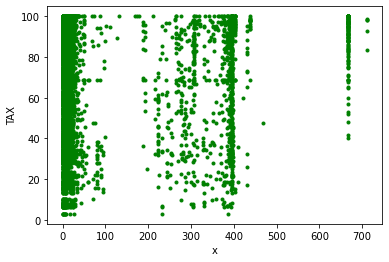

In [21]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("TAX",)
plt.show()

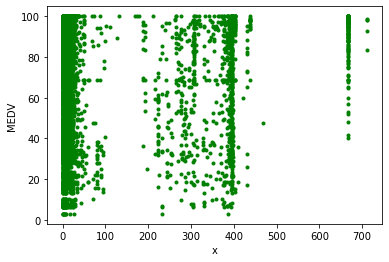

In [22]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("MEDV",)
plt.show()

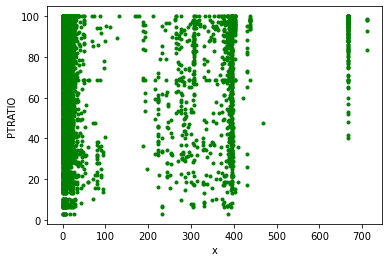

In [23]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("PTRATIO",)
plt.show()

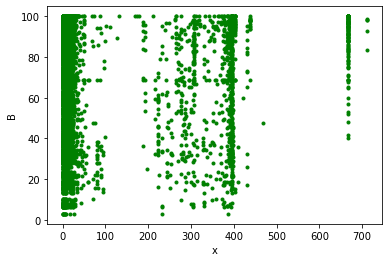

In [24]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("B",)
plt.show()

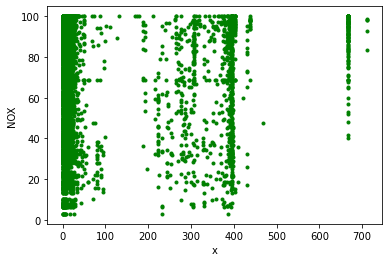

In [25]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("NOX",)
plt.show()

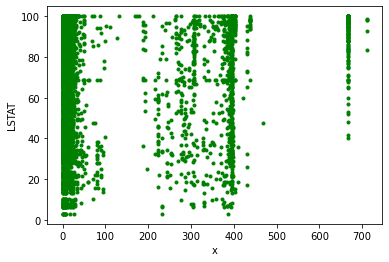

In [26]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("LSTAT",)
plt.show()

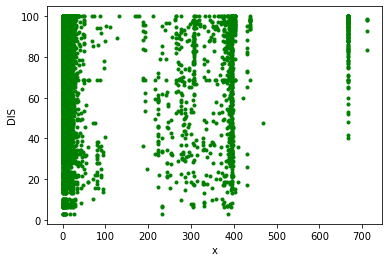

In [27]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("DIS",)
plt.show()

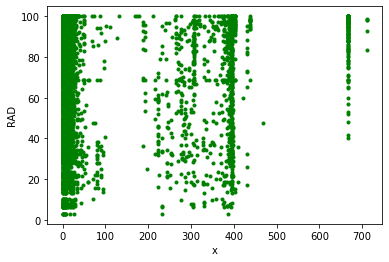

In [28]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("RAD",)
plt.show()

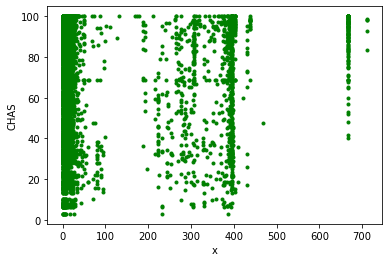

In [29]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("CHAS",)
plt.show()

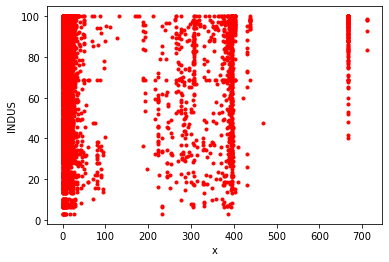

In [30]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'r.')
plt.xlabel("x")
plt.ylabel("INDUS",)
plt.show()

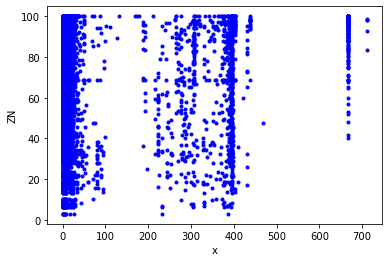

In [31]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'b.')
plt.xlabel("x")
plt.ylabel("ZN",)
plt.show()

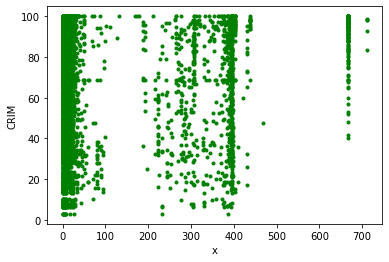

In [32]:
import matplotlib.pyplot as plt
plt.plot(x,y, 'g.')
plt.xlabel("x")
plt.ylabel("CRIM",)
plt.show()

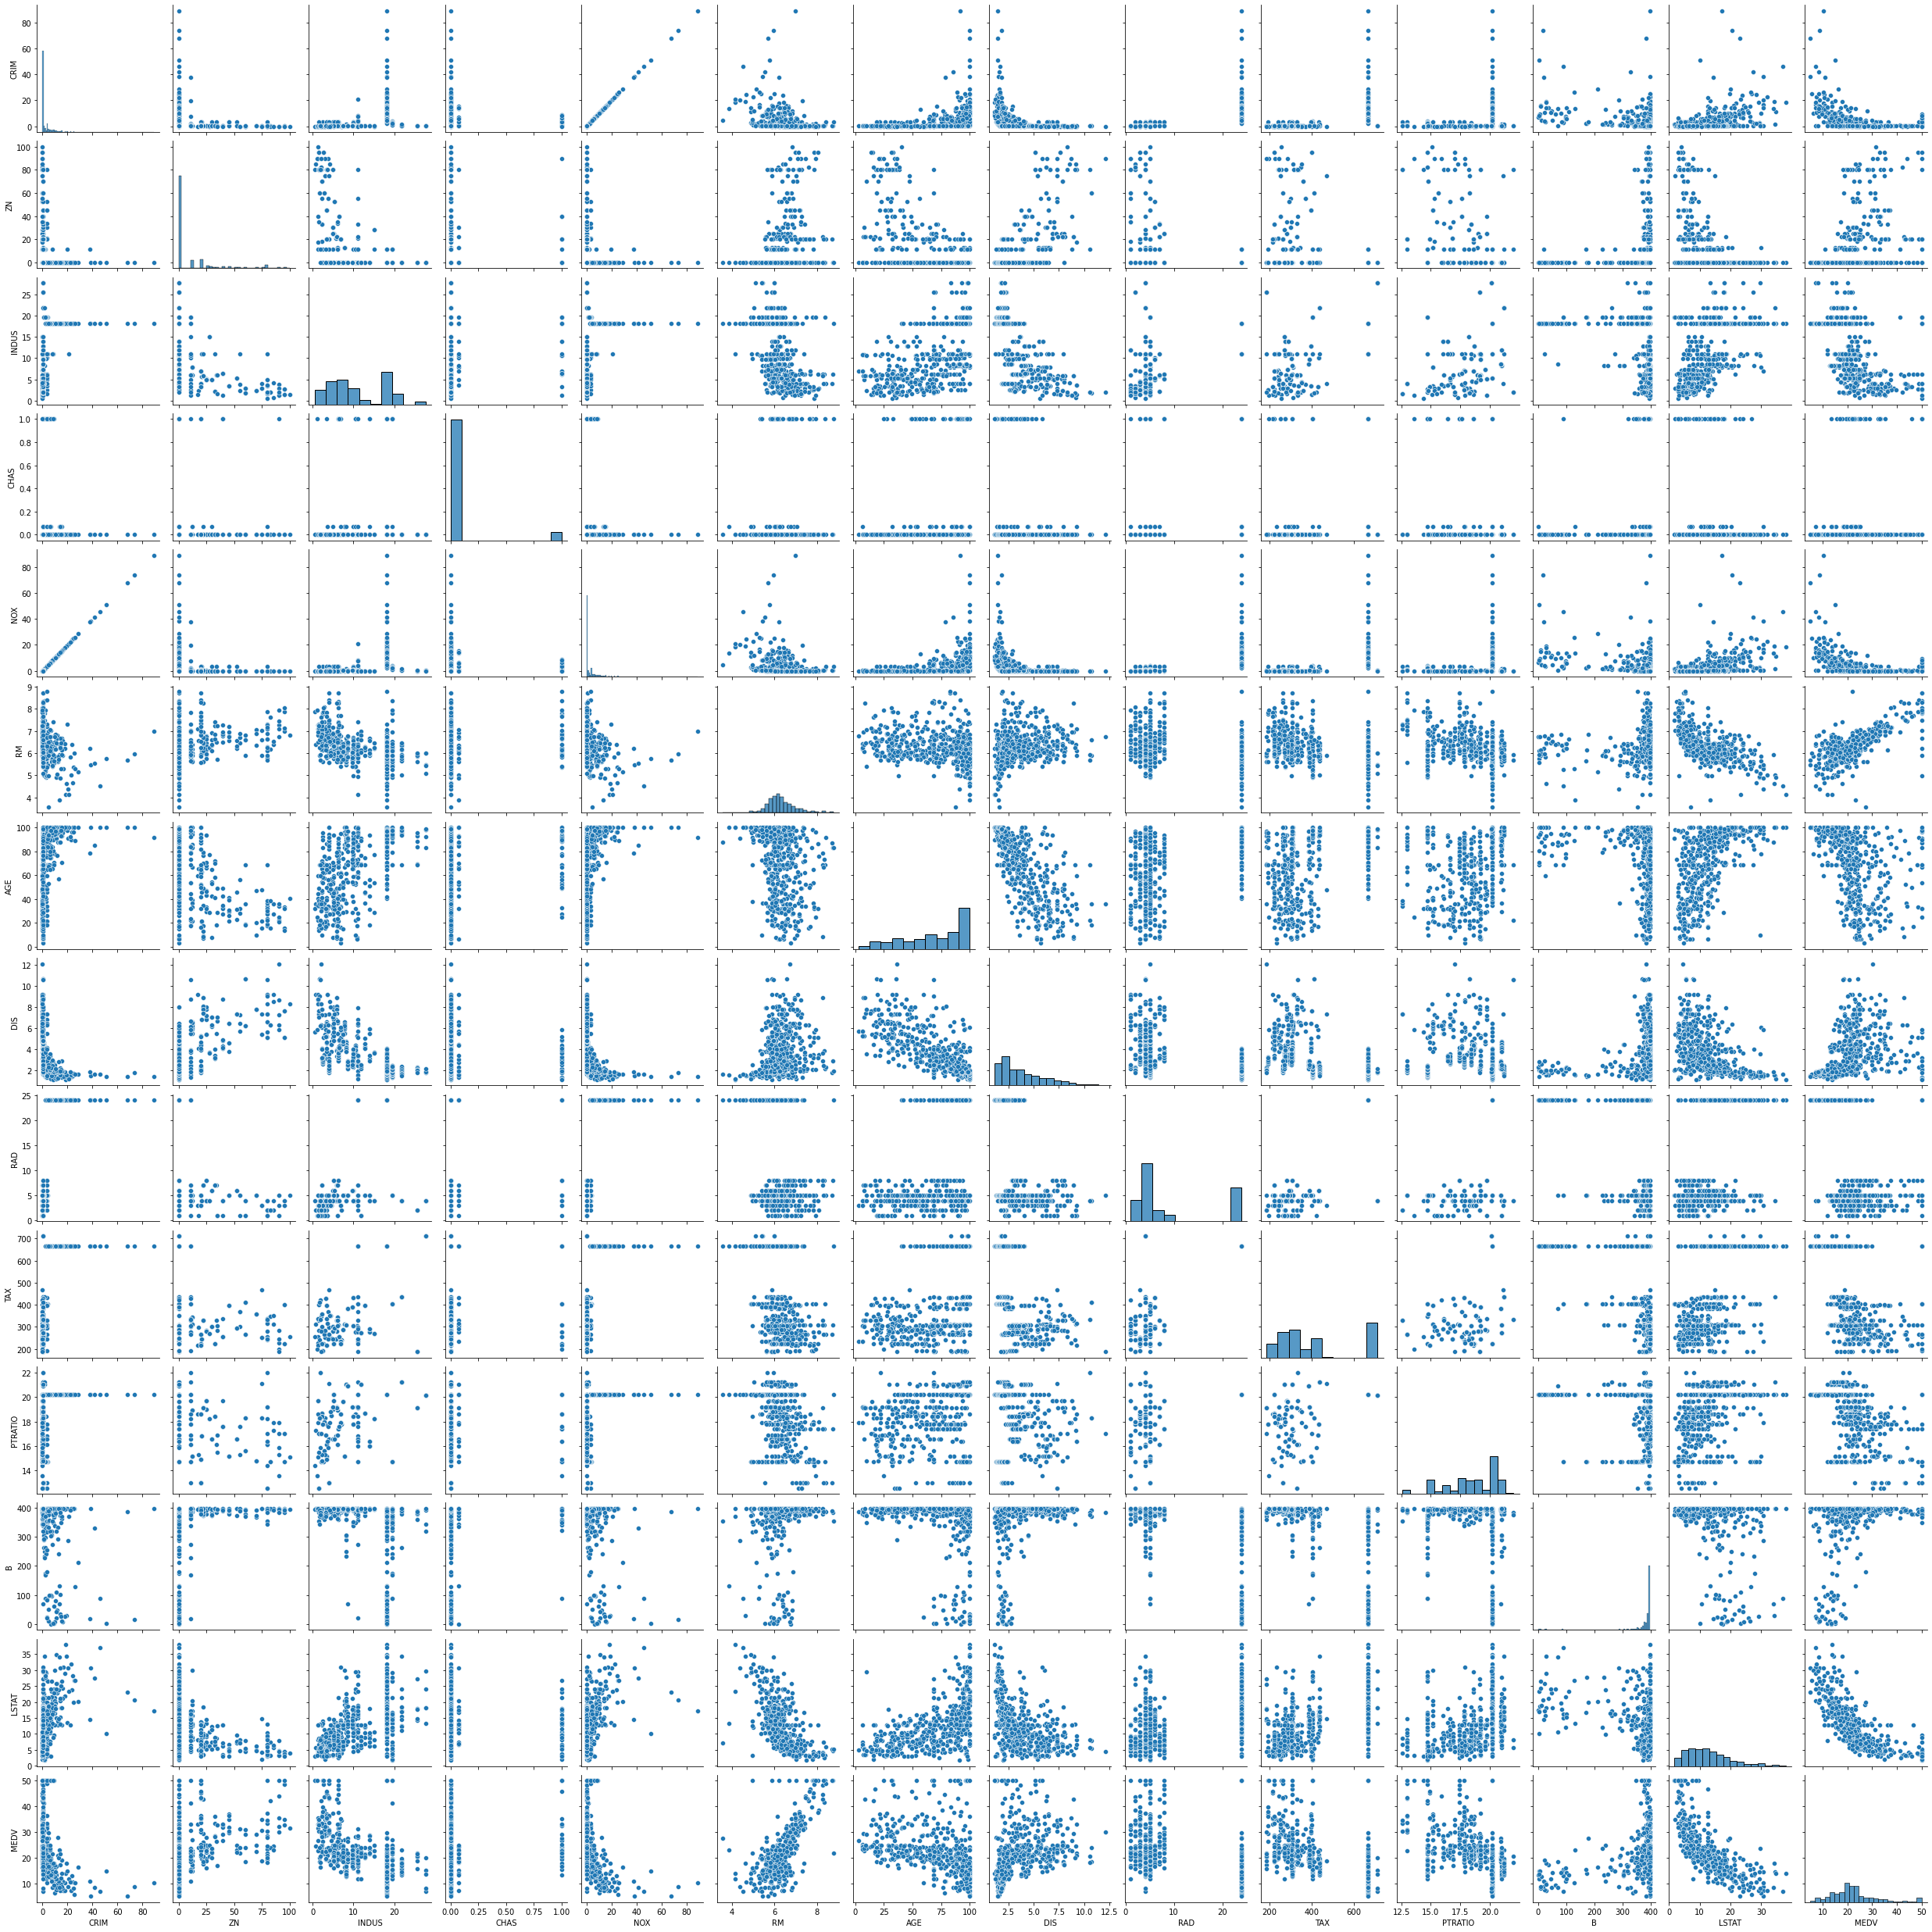

In [33]:
# visualize using a pairplot
sns.pairplot(boston)

<AxesSubplot:>

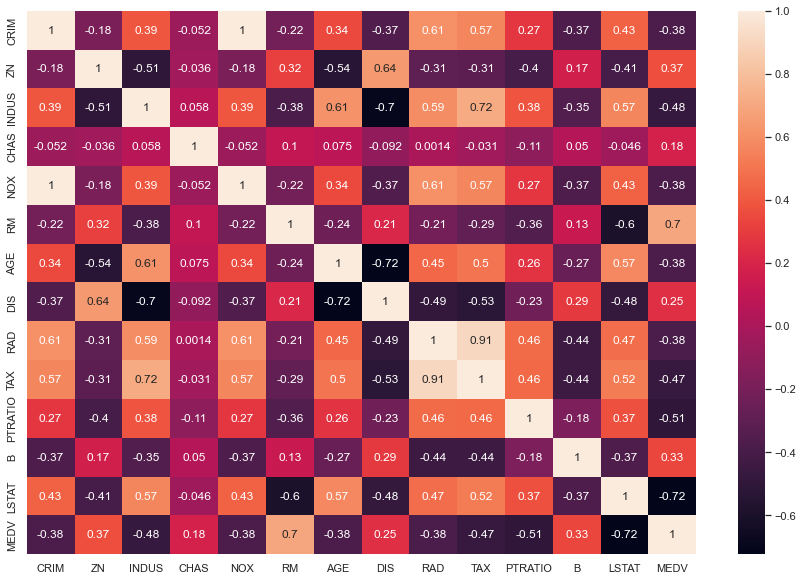

In [34]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(boston.corr(), annot=True)

In [35]:
# select the important features having correlation of +0.5 amd -0.5
dep_feat = list(boston.corr()['TAX'][(boston.corr()['TAX']>+0.4)|(boston.corr()['TAX']<-0.4)].index)
dep_feat

['CRIM',
 'INDUS',
 'NOX',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

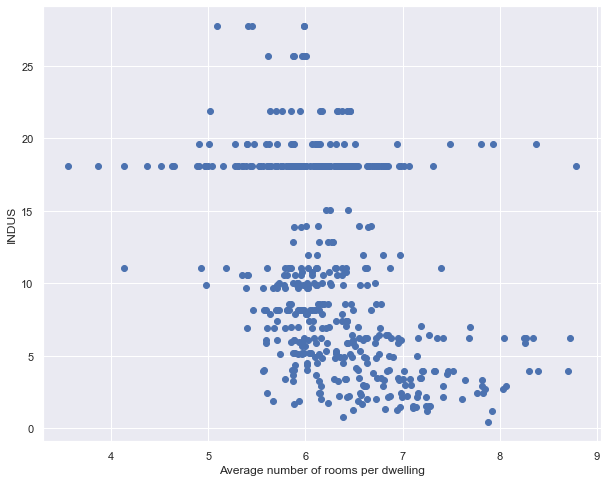

In [36]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['RM'], boston['INDUS'])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("INDUS")
plt.show()

In [37]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,1.000000,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.182930,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.391161,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,-0.052223,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,1.000000,-0.182930,0.391161,-0.052223,1.000000,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
RM,-0.215434,0.316550,-0.381457,0.102284,-0.215434,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.344934,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.366523,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.608886,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.566528,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


<AxesSubplot:>

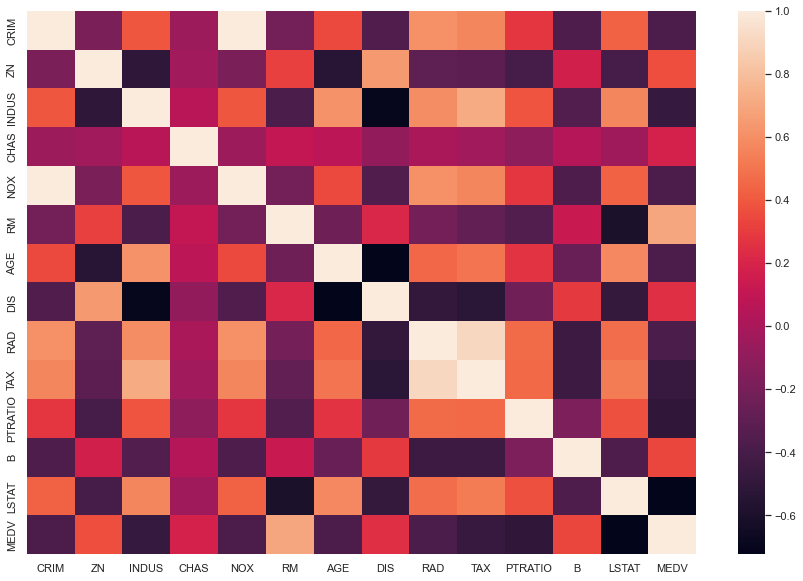

In [38]:
sns.heatmap(boston.corr())

In [39]:
print(boston.DIS)

0      4.0900
1      4.9671
2      4.9671
3      6.0622
4      6.0622
        ...  
501    2.4786
502    2.2875
503    2.1675
504    2.3889
505    2.5050
Name: DIS, Length: 506, dtype: float64


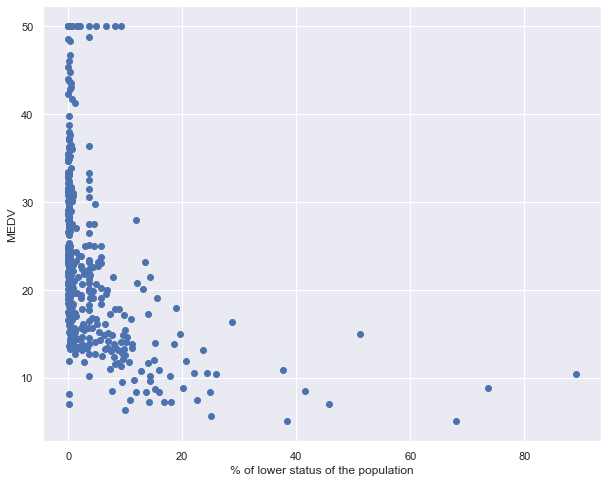

In [40]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['CRIM'],boston['MEDV'])
plt.xlabel("% of lower status of the population")
plt.ylabel("MEDV")
plt.show()

In [41]:
# select the important features having correlation of +0.5 amd -0.5
dep_feat = list(boston.corr()['AGE'][(boston.corr()['AGE']>+0.4)|(boston.corr()['AGE']<-0.4)].index)
dep_feat

['ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'LSTAT']

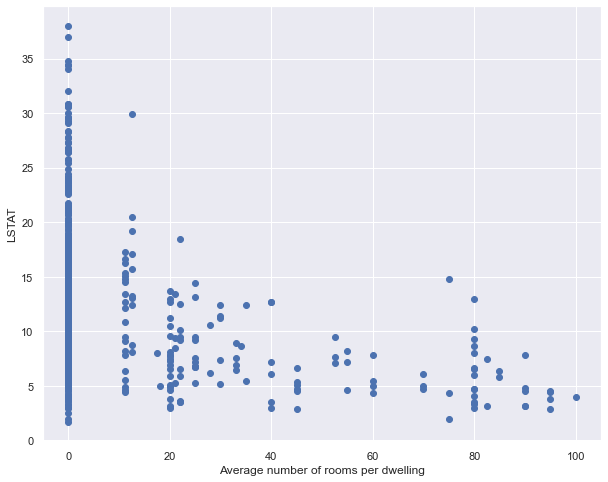

In [42]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['ZN'], boston['LSTAT'])
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("LSTAT")
plt.show()

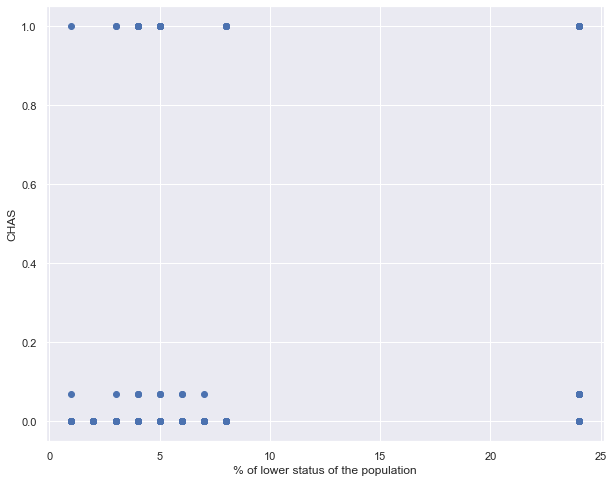

In [43]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['RAD'],boston['CHAS'])
plt.xlabel("% of lower status of the population")
plt.ylabel("CHAS")
plt.show()

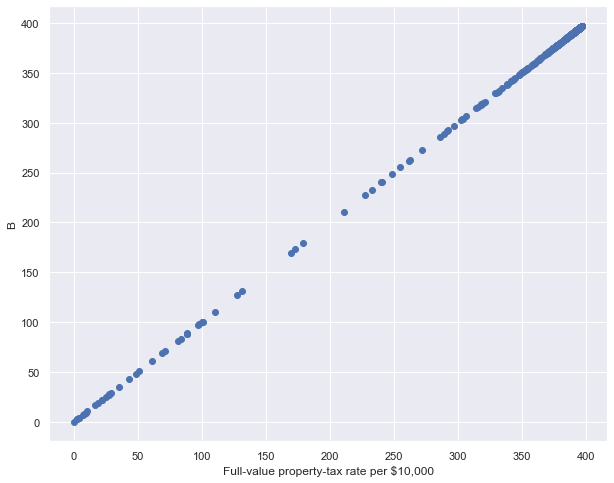

In [44]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['B'],boston['B'])
plt.xlabel("Full-value property-tax rate per $10,000")
plt.ylabel("B")
plt.show()

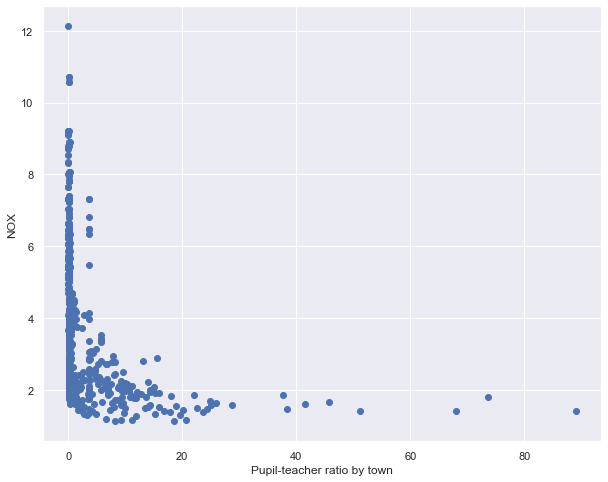

In [45]:
plt.figure(figsize=(10,8),facecolor='white')
plt.scatter(boston['NOX'],boston['DIS'])
plt.xlabel("Pupil-teacher ratio by town")
plt.ylabel("NOX")
plt.show()

In [46]:
# Select dependent and independent feature
X=boston.iloc[:,:-1]
y=boston.iloc[:,-1]

In [47]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=1)

In [48]:
# Standardize the dataset
# import the library
from sklearn.preprocessing import StandardScaler
# run now
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import Ridge

In [50]:
rdg=Ridge()

In [51]:
import numpy as np

In [52]:
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer

# Check for missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)


In [53]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [54]:
rdg.fit(X_train, y_train)

Ridge()

In [55]:
# Train the model using ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
# fit the x into the model
ridge.fit(X_train,y_train)
# Use the model to predict
ridge_pred=ridge.predict(X_test)

In [56]:
ridge_pred

array([32.15122316, 28.58741061, 16.50031763, 21.34317407, 19.08704457,
       20.1545539 , 32.54395006, 18.03071949, 23.8599772 , 26.60008675,
       25.0179941 , 29.98820531, 20.70463335, 25.85904037, 22.38855691,
       18.63755305, 23.23064563, 38.63990407, 29.5353895 , 12.20372058,
       20.20812524, 19.35107562, 24.91473701, 25.6621982 , 31.00086039,
       10.55846224, 14.16392309, 17.02124073, 37.45355578, 14.22772987,
       22.41052696, 13.06137554, 43.63266946, 19.12633949, 22.63434518,
       22.04747965, 18.75384353, 24.70213249,  7.6338485 , 18.52968634,
       24.89538895, 23.25600032, 28.287494  , 14.6729576 , 18.02621469,
       16.59818756, 39.1054663 , 18.8898078 , 23.65356028, 19.72596347,
       24.75170092, 23.6614187 , 25.17904463, 24.59469923,  3.30345671,
       23.89282621, 12.06861232, 26.91297627, 17.52275448, 36.50757573,
       20.08863231, 27.14976985, 16.26655894, 17.48573338, 12.70522484,
       32.50319337, 37.23769116, 22.8076385 , 22.96470219, 22.98

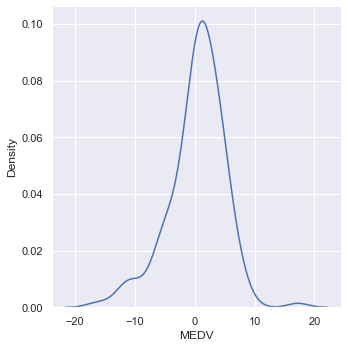

In [57]:
# Show the distribution and residual value
residual=ridge_pred - y_test
sns.displot(residual, kind='kde')

In [58]:
# Let's check performance metrics of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

21.892223520774994
3.5047747063911725
4.67891264299463


In [59]:
# check r2 model score
from sklearn.metrics import r2_score
score=r2_score(y_test,ridge_pred)
print(score)

0.7513850954464006


In [60]:
# Adjusted R square score
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7302609532294282